In [110]:
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (RandomForestRegressor, 
                             GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import scipy

## Cargando datos y pipeline

In [111]:
fe_pipeline = joblib.load("../models/fe_pipeline.joblib")
fe_pipeline

,steps,"[('missing_indicator', ...), ('numerical_imputation', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_only,True
,variables,"['antiguedad', 'kilometraje', ...]"
,imputation_method,'median'
,variables,"['antiguedad', 'kilometraje']"
,imputation_method,'missing'
,fill_value,'missing'
,variables,"['vehicle_brand', 'vehicle_line', ...]"


In [112]:
X_train_transformed = pd.read_excel("../data/gold/X_train_transformed.xlsx")
X_test_transformed = pd.read_excel("../data/gold/X_test_transformed.xlsx")



In [113]:
y_train = X_train_transformed['price']
y_test = X_test_transformed['price']
X_train_transformed = X_train_transformed.drop(columns=['price'])
X_test_transformed = X_test_transformed.drop(columns=['price'])

## Regresion lineal

In [114]:
lr = LinearRegression()

In [115]:
lr.fit(X_train_transformed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [116]:
y_pred_train = lr.predict(X_train_transformed)

## Metricas en train

In [117]:
r2= r2_score(y_train, y_pred_train)
mse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)
medae = median_absolute_error(y_train, y_pred_train)

metrics_train = {
    "r2": r2,
    "mse": mse,
    "mae": mae,
    "medae": medae
}
metrics_train



{'r2': 0.4771798456247871,
 'mse': np.float64(48057450.212571554),
 'mae': 27957521.440387,
 'medae': 19364640.64176935}

## Metricas en test

In [118]:
y_pred_test = lr.predict(X_test_transformed)

In [119]:
r2_test = r2_score(y_test, y_pred_test)
mse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)

metrics_test = {
    "r2": r2_test,
    "mse": mse_test,
    "mae": mae_test,
    "medae": medae_test
}
metrics_test

{'r2': 0.4688398738771987,
 'mse': np.float64(48086189.799851425),
 'mae': 28940058.797568023,
 'medae': 20064302.52578436}

In [120]:
metrics = {
    "train": metrics_train,
    "test": metrics_test
}
metrics


{'train': {'r2': 0.4771798456247871,
  'mse': np.float64(48057450.212571554),
  'mae': 27957521.440387,
  'medae': 19364640.64176935},
 'test': {'r2': 0.4688398738771987,
  'mse': np.float64(48086189.799851425),
  'mae': 28940058.797568023,
  'medae': 20064302.52578436}}

In [121]:
pd.DataFrame(metrics)

,train,test
r2,4.771798e-01,4.688399e-01
mse,4.805745e+07,4.808619e+07
mae,2.795752e+07,2.894006e+07
medae,1.936464e+07,2.006430e+07


In [122]:
lr.coef_

array([-2.01509621e+08, -9.12953052e+07,  5.29775801e+07,  9.73539505e+07,
        1.51236356e+07, -2.48712051e+05, -9.54752809e+05, -5.90822581e+06,
       -7.91292390e+06,  2.56992402e+06])

In [123]:
lr.intercept_

np.float64(38422005.44531365)

- Inferencia: Encontrar relaciones causales (Investigacion): Cientificos - Supuestos 
- Prediccion: Predecir el precio de la mejor manera posible (Cientifico de datos) Tecnologia

In [124]:
X_test_transformed

,antiguedad,kilometraje,vehicle_brand,vehicle_line,location_state,antiguedad_na,kilometraje_na,vehicle_brand_na,vehicle_line_na,location_state_na
0,0.120690,0.032383,0.193548,0.877698,0.25,1,0,0,0,0
1,0.258621,0.067531,0.419355,0.237410,0.25,0,0,0,0,0
2,0.224138,0.154932,0.580645,0.676259,0.25,0,0,0,0,0
3,0.051724,0.029122,0.935484,0.812950,0.00,0,0,0,0,1
4,0.137931,0.080977,0.225806,0.266187,0.25,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2170,0.068966,0.037178,0.129032,0.050360,0.75,0,0,0,0,0
2171,0.051724,0.079825,0.129032,0.633094,0.50,0,0,0,0,0
2172,0.120690,0.103676,0.838710,0.827338,0.00,1,0,0,0,1
2173,0.258621,0.160757,0.516129,0.978417,0.25,0,0,0,0,0


## Random Forest

In [125]:
rf = RandomForestRegressor()
rf.fit(X_train_transformed, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [126]:
y_pred_train_rf = rf.predict(X_train_transformed)
r2_rf = r2_score(y_train, y_pred_train_rf)
mse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
medae_rf = median_absolute_error(y_train, y_pred_train_rf)

metrics_rf_train = {
    "r2": r2_rf,
    "mse": mse_rf,
    "mae": mae_rf,
    "medae": medae_rf
}
metrics_rf_train


{'r2': 0.9495153848363532,
 'mse': np.float64(14933585.377203727),
 'mae': 6417816.459379965,
 'medae': 2923933.3333333135}

In [127]:
y_pred_test_rf = rf.predict(X_test_transformed)
r2_rf = r2_score(y_test, y_pred_test_rf)
mse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
medae_rf = median_absolute_error(y_test, y_pred_test_rf)

metrics_rf_test = {
    "r2": r2_rf,
    "mse": mse_rf,
    "mae": mae_rf,
    "medae": medae_rf
}
metrics_rf_test

{'r2': 0.688538520487343,
 'mse': np.float64(36822206.12169801),
 'mae': 17424696.774199605,
 'medae': 8292000.0}

In [128]:
metrics_rf = {
    "train": metrics_rf_train,
    "test": metrics_rf_test
}
metrics_rf

{'train': {'r2': 0.9495153848363532,
  'mse': np.float64(14933585.377203727),
  'mae': 6417816.459379965,
  'medae': 2923933.3333333135},
 'test': {'r2': 0.688538520487343,
  'mse': np.float64(36822206.12169801),
  'mae': 17424696.774199605,
  'medae': 8292000.0}}

In [129]:
metrics

{'train': {'r2': 0.4771798456247871,
  'mse': np.float64(48057450.212571554),
  'mae': 27957521.440387,
  'medae': 19364640.64176935},
 'test': {'r2': 0.4688398738771987,
  'mse': np.float64(48086189.799851425),
  'mae': 28940058.797568023,
  'medae': 20064302.52578436}}

In [130]:
y_exploracion = {
    "test": y_test,
    "y_pred_lr": y_pred_test,
    "y_pred_rf": y_pred_test_rf
}
y_exploracion
y_exploracion_df = pd.DataFrame(y_exploracion)
y_exploracion_df



,test,y_pred_lr,y_pred_rf
0,188500000,1.103787e+08,151432000.0
1,38000000,2.925229e+07,31034000.0
2,70000000,7.949003e+07,65952000.0
3,169000000,1.566139e+08,141054300.0
4,50000000,4.489274e+07,52512000.0
...,...,...,...
2170,41000000,4.421185e+07,40458000.0
2171,39000000,9.674328e+07,106229700.0
2172,59900000,1.319354e+08,90906000.0
2173,75000000,9.800806e+07,84832000.0


## GradientBossting

In [131]:
gb = GradientBoostingRegressor()
gb.fit(X_train_transformed, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [132]:
y_pred_train_gb = gb.predict(X_train_transformed)
r2_gb = r2_score(y_train, y_pred_train_gb)
mse_gb = np.sqrt(mean_squared_error(y_train, y_pred_train_gb))
mae_gb = mean_absolute_error(y_train, y_pred_train_gb)
medae_gb = median_absolute_error(y_train, y_pred_train_gb)

metrics_gb_train = {
    "r2": r2_gb,
    "mse": mse_gb,
    "mae": mae_gb,
    "medae": medae_gb
}
metrics_gb_train

{'r2': 0.7190882187616463,
 'mse': np.float64(35226503.71966198),
 'mae': 16844316.357557807,
 'medae': 9580578.265350893}

In [133]:
y_pred_test_gb = gb.predict(X_test_transformed)
r2_gb = r2_score(y_test, y_pred_test_gb)
mse_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))
mae_gb = mean_absolute_error(y_test, y_pred_test_gb)
medae_gb = median_absolute_error(y_test, y_pred_test_gb)

metrics_gb_test = {
    "r2": r2_gb,
    "mse": mse_gb,
    "mae": mae_gb,
    "medae": medae_gb
}
metrics_gb_test


{'r2': 0.6879373395955601,
 'mse': np.float64(36857725.979507625),
 'mae': 19003645.80052871,
 'medae': 10687422.657763861}

In [134]:

metrics_gb = {
    "train": metrics_gb_train,
    "test": metrics_gb_test
}
metrics_gb


{'train': {'r2': 0.7190882187616463,
  'mse': np.float64(35226503.71966198),
  'mae': 16844316.357557807,
  'medae': 9580578.265350893},
 'test': {'r2': 0.6879373395955601,
  'mse': np.float64(36857725.979507625),
  'mae': 19003645.80052871,
  'medae': 10687422.657763861}}

In [135]:
metrics_rf

{'train': {'r2': 0.9495153848363532,
  'mse': np.float64(14933585.377203727),
  'mae': 6417816.459379965,
  'medae': 2923933.3333333135},
 'test': {'r2': 0.688538520487343,
  'mse': np.float64(36822206.12169801),
  'mae': 17424696.774199605,
  'medae': 8292000.0}}

## Maquina de soporte vectorial

In [136]:
y_exploracion_df['y_pred_gb'] = y_pred_test_gb

In [137]:
# Mostrar los valores en formato moneda (pesos mexicanos)
y_exploracion_df.style.format({
    "test": "${:,.0f}",
    "y_pred_lr": "${:,.0f}",
    "y_pred_rf": "${:,.0f}",
    "y_pred_gb": "${:,.0f}"
})

,test,y_pred_lr,y_pred_rf,y_pred_gb
0,"$188,500,000","$110,378,698","$151,432,000","$104,973,544"
1,"$38,000,000","$29,252,290","$31,034,000","$35,137,988"
2,"$70,000,000","$79,490,033","$65,952,000","$61,766,870"
3,"$169,000,000","$156,613,877","$141,054,300","$152,955,532"
4,"$50,000,000","$44,892,739","$52,512,000","$49,047,537"
5,"$78,000,000","$58,704,107","$70,010,000","$67,769,593"
6,"$51,800,000","$77,334,806","$52,465,000","$61,269,064"
7,"$135,000,000","$81,086,488","$63,168,900","$73,299,729"
8,"$50,000,000","$39,166,002","$42,372,500","$42,798,120"
9,"$72,000,000","$112,407,980","$76,081,000","$95,970,622"


<Axes: >

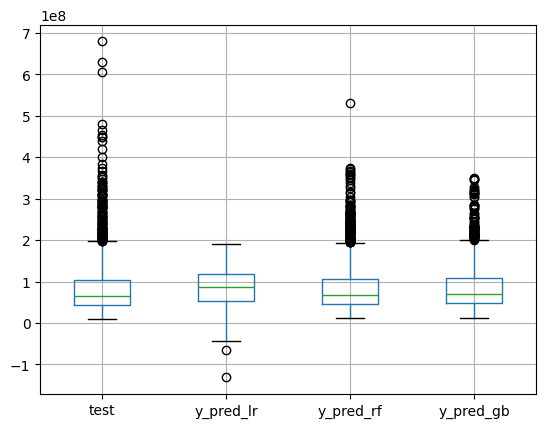

In [138]:
y_exploracion_df.boxplot()

array([[<Axes: title={'center': 'test'}>,
        <Axes: title={'center': 'y_pred_lr'}>],
       [<Axes: title={'center': 'y_pred_rf'}>,
        <Axes: title={'center': 'y_pred_gb'}>]], dtype=object)

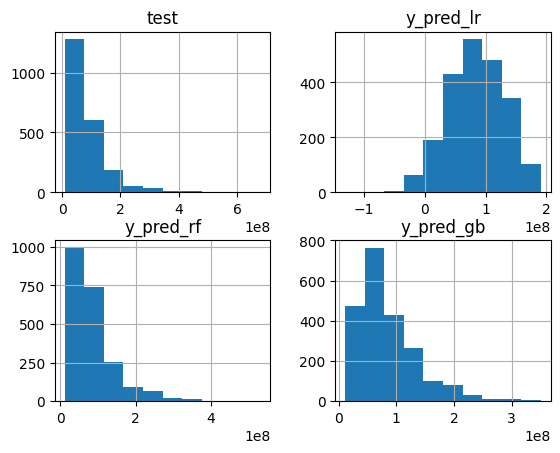

In [139]:
y_exploracion_df.hist()